## EDA on Final Dataset

In [34]:
#import requried libraries
import pandas as pd
pd.options.display.max_rows = 5
pd.options.display.max_columns=25

import numpy as np
import random as rand

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
sns.set_context('paper')

from pandas.api.types import CategoricalDtype


inputfile = 'CKME136X10_2018_Initial_Data_Cleaned.csv'

In [35]:
# read data
df = pd.read_csv(inputfile, engine = 'python')

In [36]:
def typecast(df):
    df = df.astype('category')
    df['C_MNTH'] = df['C_MNTH'].astype(CategoricalDtype(ordered=True))
    df['C_WDAY'] = df['C_WDAY'].astype(CategoricalDtype(ordered=True))
    df['C_HOUR'] = df['C_HOUR'].astype(CategoricalDtype(ordered=True))
    df['C_VEHS'] = df['C_VEHS'].astype(CategoricalDtype(ordered=True))
    df['P_PSN'] = df['P_PSN'].astype(CategoricalDtype(ordered=True))
    df['P_AGE'] = df['P_AGE'].astype('int')
    df['P_ISEV'] = df['P_ISEV'].astype('int')
    return df

In [37]:
df = typecast(df)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4116904 entries, 0 to 4116903
Data columns (total 19 columns):
C_YEAR    category
C_MNTH    category
C_WDAY    category
C_HOUR    category
C_VEHS    category
C_CONF    category
C_RCFG    category
C_WTHR    category
C_RSUR    category
C_RALN    category
C_TRAF    category
V_TYPE    category
V_YEAR    category
P_SEX     category
P_AGE     int32
P_PSN     category
P_SAFE    category
P_USER    category
P_ISEV    int32
dtypes: category(17), int32(2)
memory usage: 98.2 MB


In [38]:
df['P_ISEV'].unique()
display(df.groupby(df['P_ISEV']).size())

P_ISEV
1    1715805
2    2372702
3      28397
dtype: int64

In [39]:
df.shape

(4116904, 19)

In [40]:
print((df.groupby(df['P_ISEV']).size()[1]/df.shape[0])*100)
print((df.groupby(df['P_ISEV']).size()[2]/df.shape[0])*100)
print((df.groupby(df['P_ISEV']).size()[3]/df.shape[0])*100)

41.677070925141805
57.6331631731029
0.6897659017552996


In [41]:
df_copy = df.copy()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000206C64A29B0>,
      dtype=object)

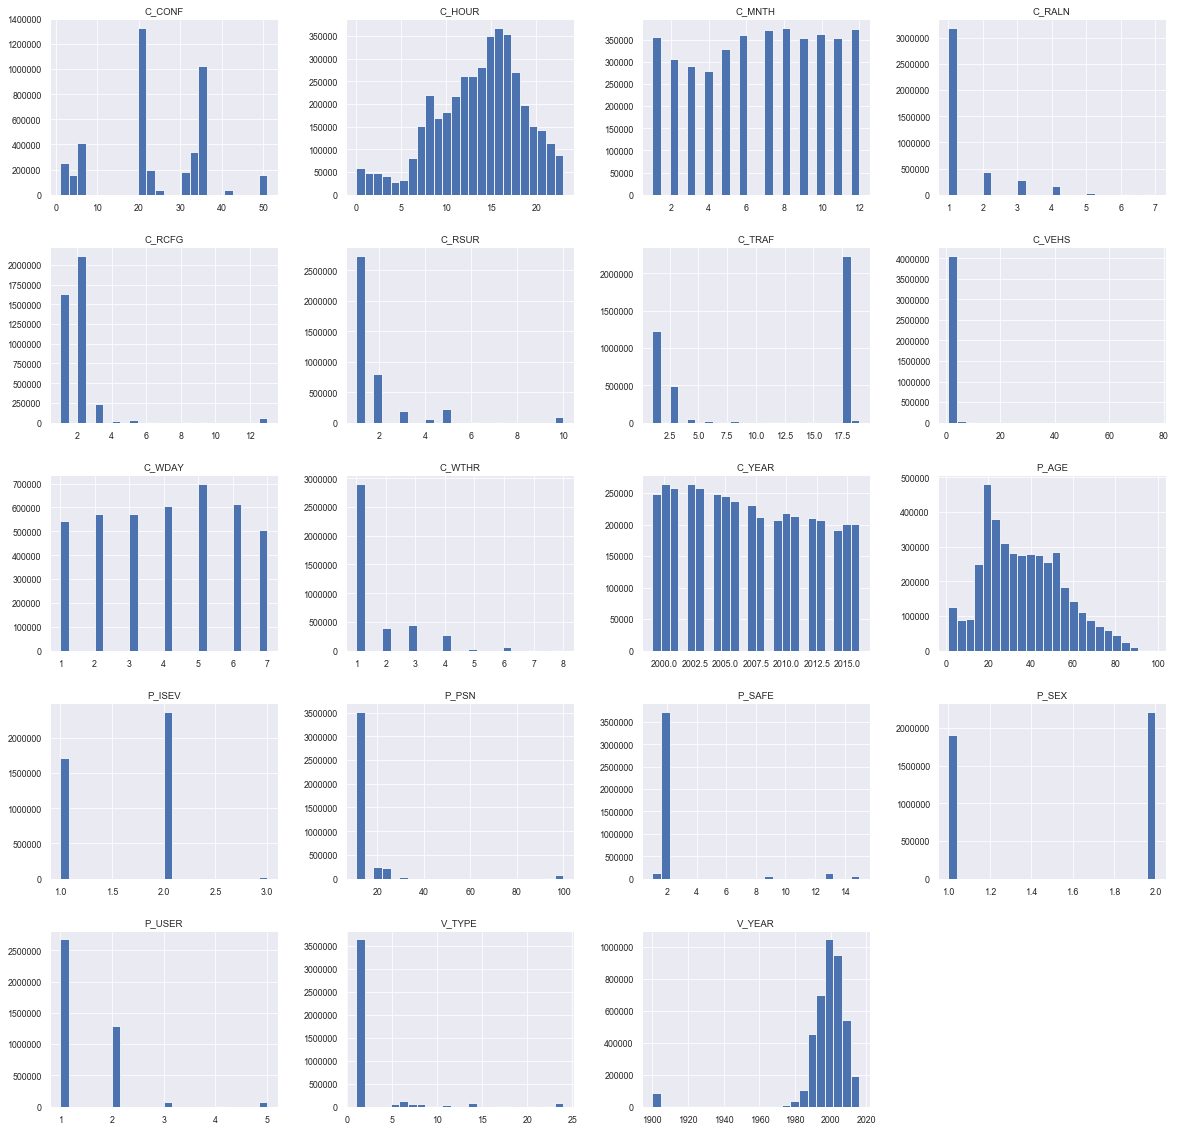

In [80]:
df.astype('int').hist(figsize = [20, 20], bins=24)

In [43]:
df_fatal = df[df['P_ISEV'] == 3]
df_injury = df[df['P_ISEV'] == 2]
df_safe = df[df['P_ISEV'] == 1]

In [70]:
df_16_fatal = df_fatal [(df_fatal['C_YEAR'] == 2016)] 
df_15_fatal = df_fatal [(df_fatal['C_YEAR'] == 2015)] 
df_14_fatal = df_fatal [(df_fatal['C_YEAR'] == 2014)] 
df_13_fatal = df_fatal [(df_fatal['C_YEAR'] == 2013)] 
df_12_fatal = df_fatal [(df_fatal['C_YEAR'] == 2012)] 
df_11_fatal = df_fatal [(df_fatal['C_YEAR'] == 2011)] 
df_10_fatal = df_fatal [(df_fatal['C_YEAR'] == 2010)] 
df_09_fatal = df_fatal [(df_fatal['C_YEAR'] == 2009)] 
df_08_fatal = df_fatal [(df_fatal['C_YEAR'] == 2008)] 

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000206C7E945C0>,
      dtype=object)

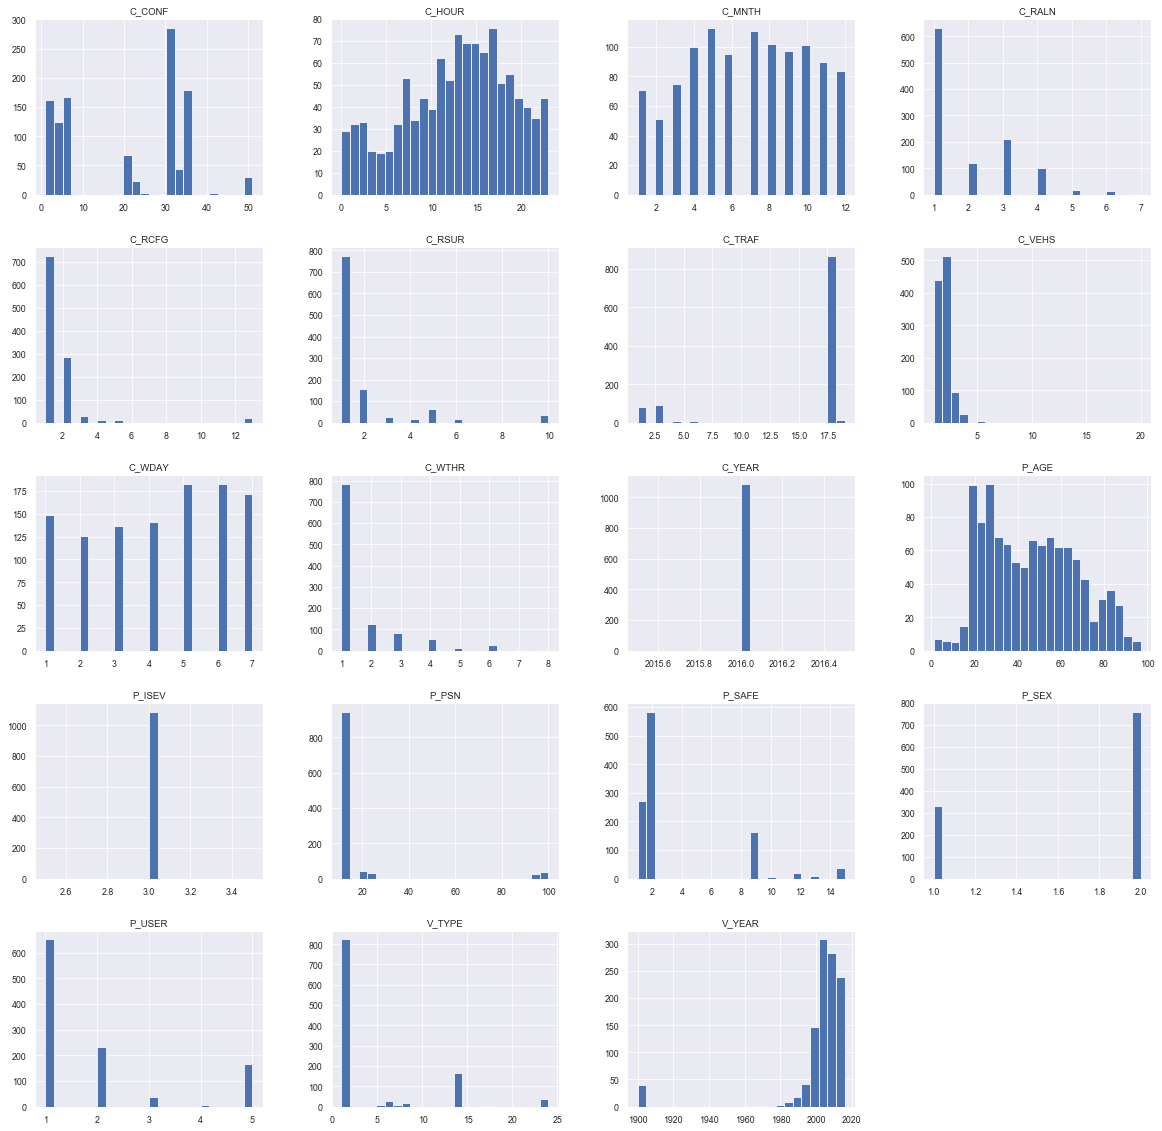

In [81]:
df_16_fatal.astype('int').hist(figsize = [20, 20], bins = 24)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000206CB260B70>,
      dtype=object)

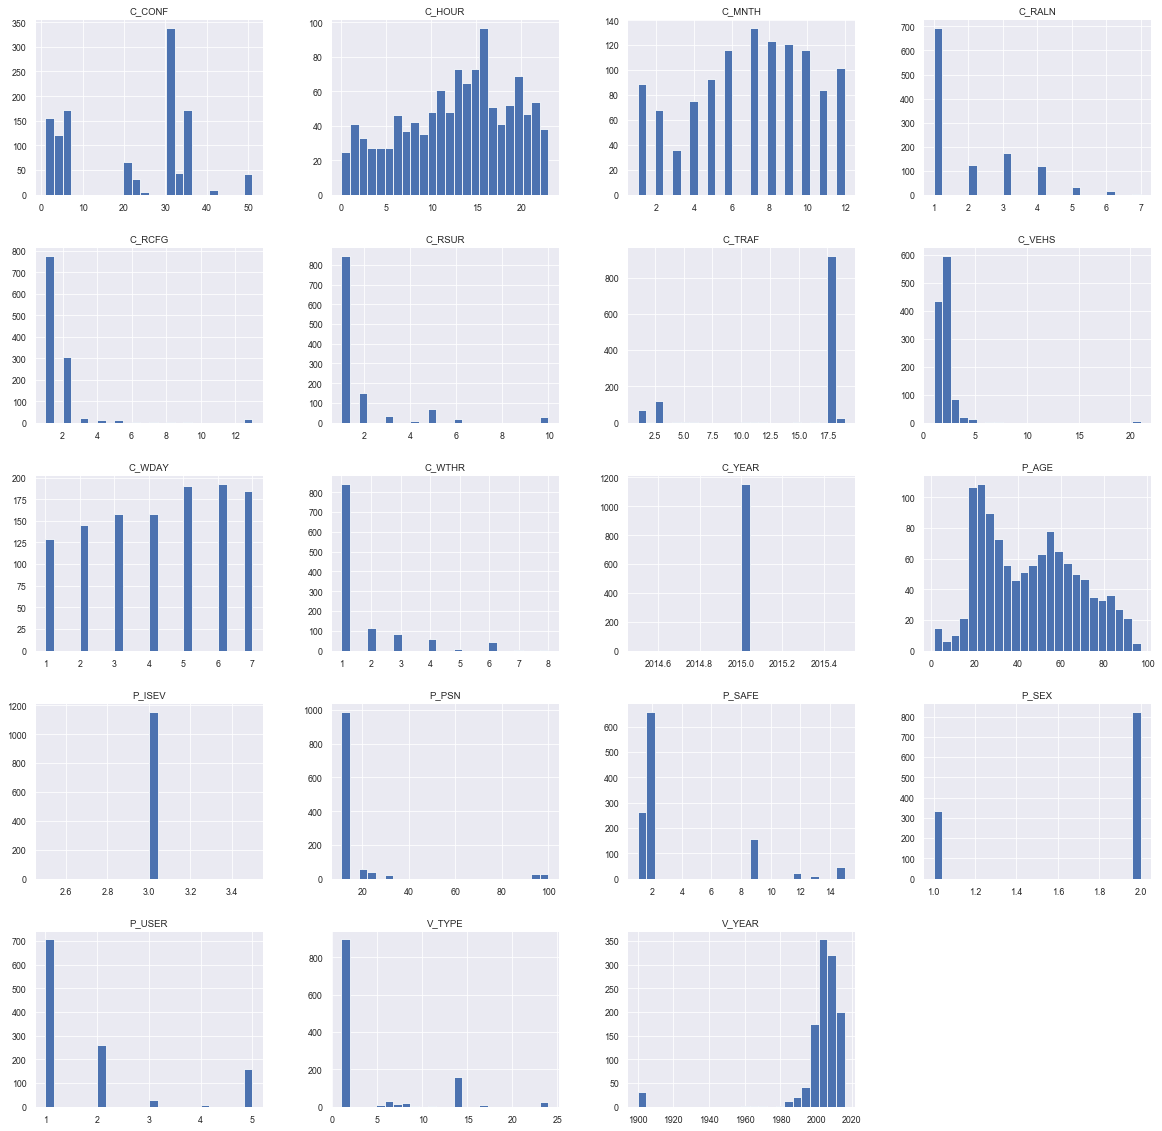

In [82]:
df_15_fatal.astype('int').hist(figsize = [20, 20], bins = 24)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000020695650470>,
      dtype=object)

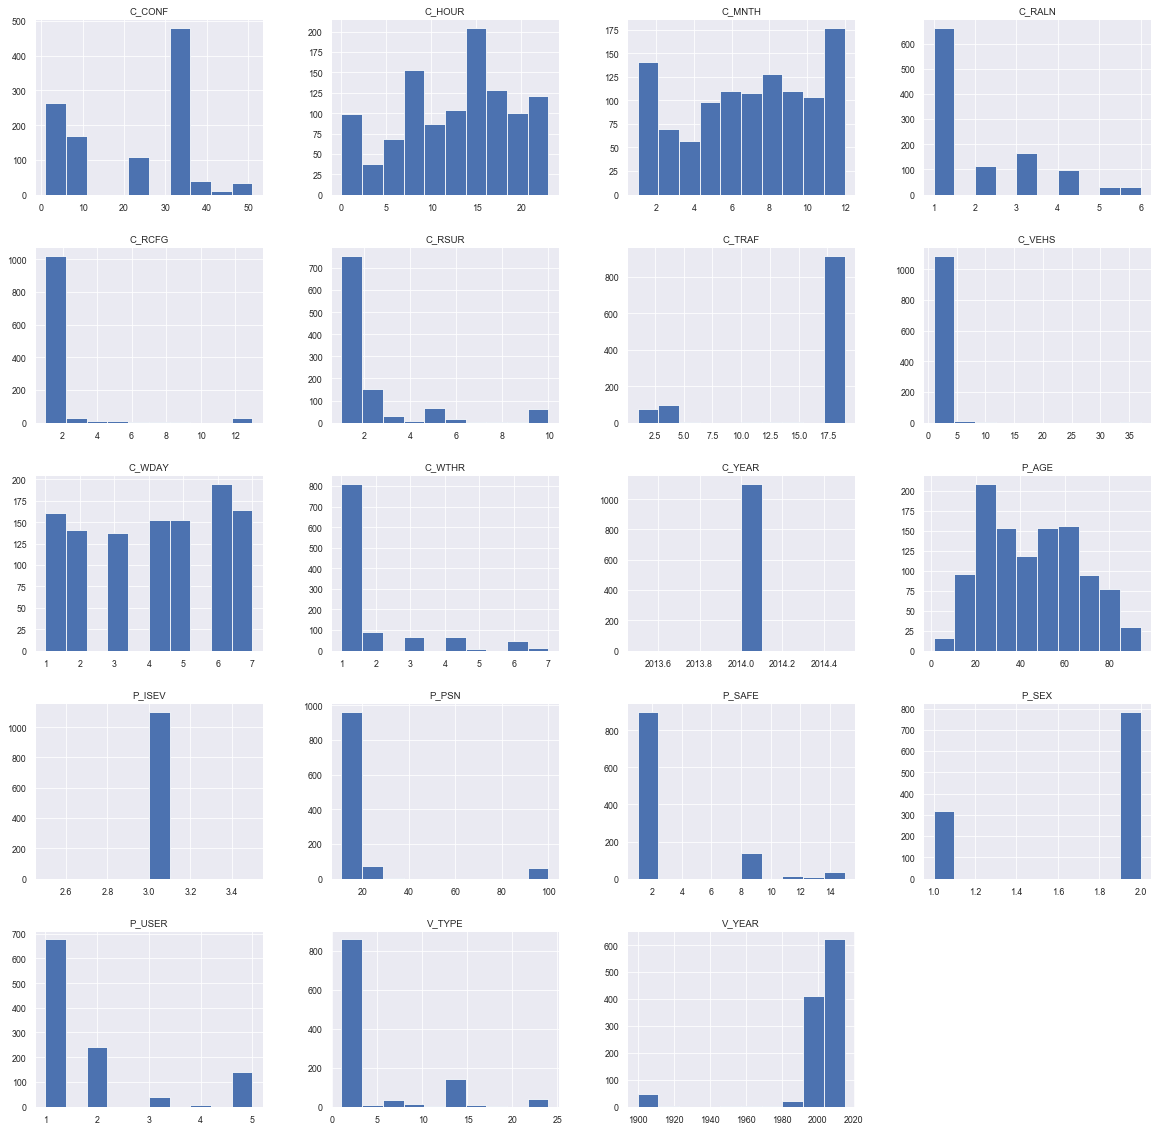

In [67]:
df_14_fatal.astype('int').hist(figsize = [20, 20])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000206957D7C18>,
      dtype=object)

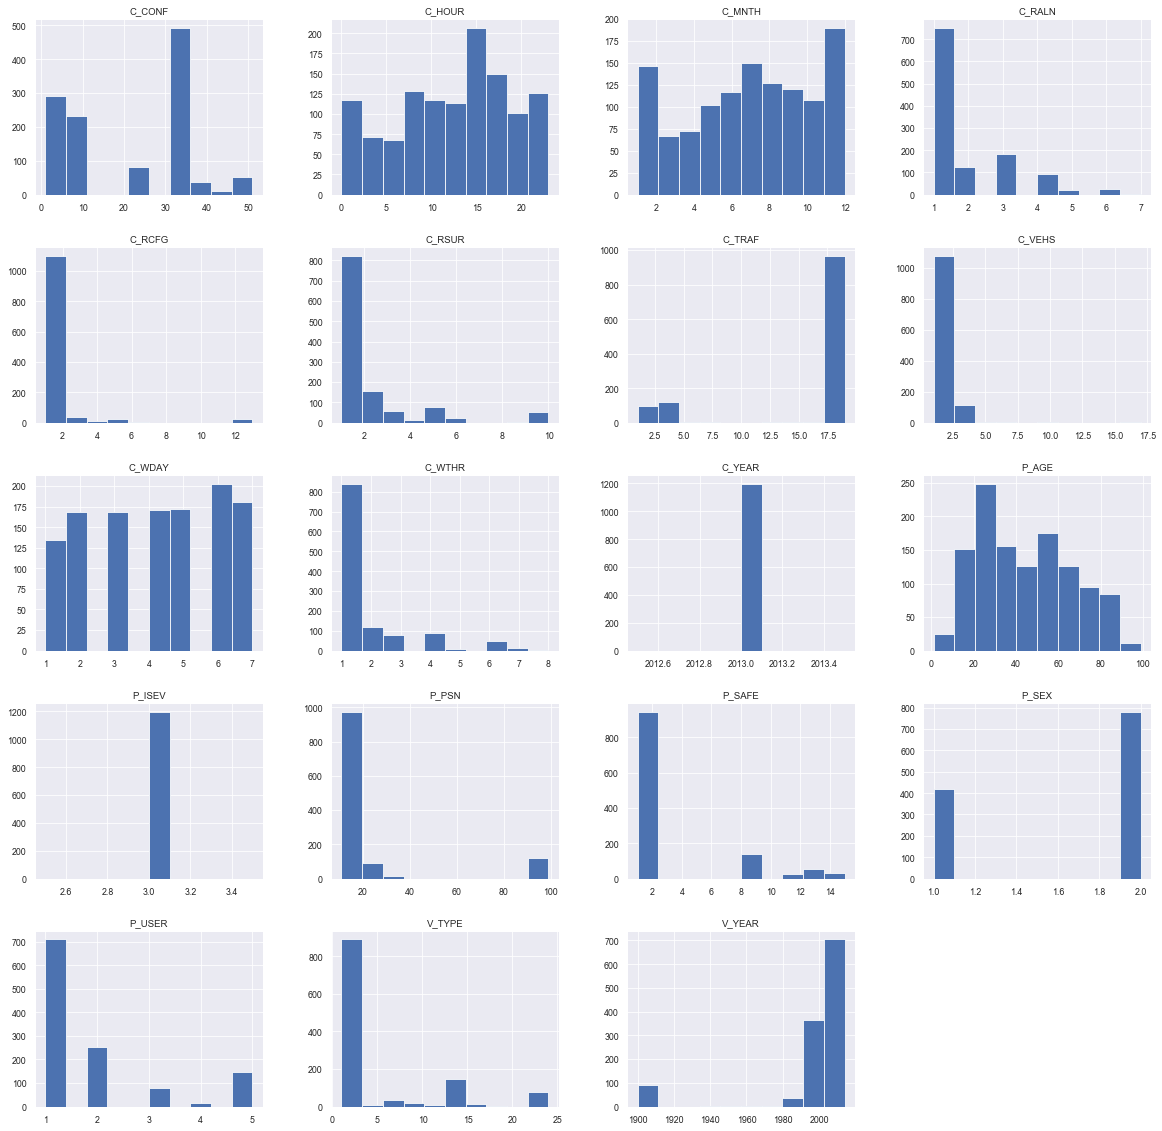

In [68]:
df_13_fatal.astype('int').hist(figsize = [20, 20])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000206B5CBAF28>,
      dtype=object)

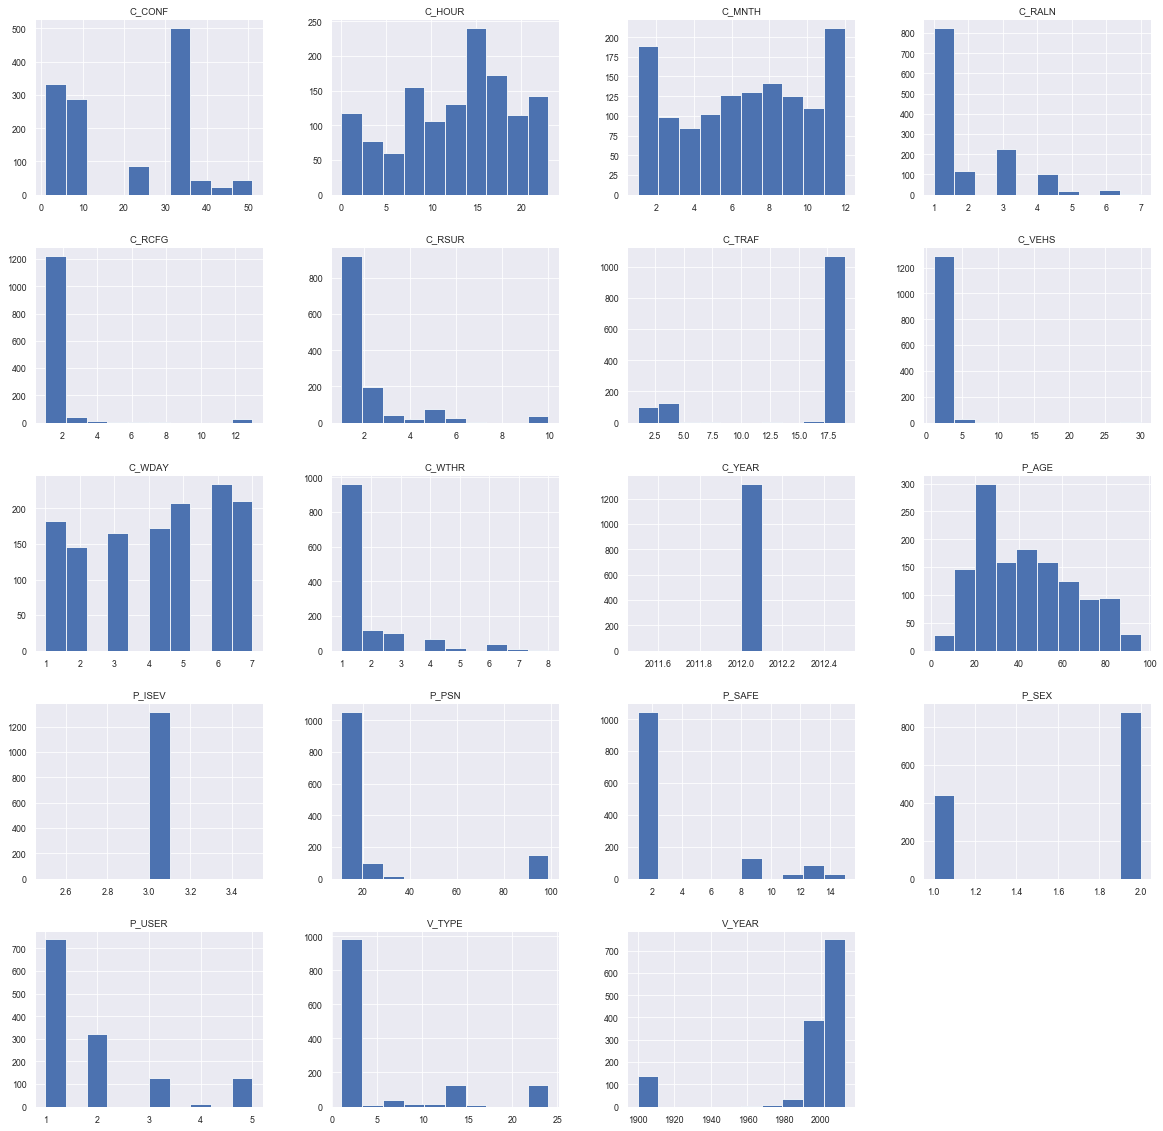

In [69]:
df_12_fatal.astype('int').hist(figsize = [20, 20])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000206BD93B518>,
      dtype=object)

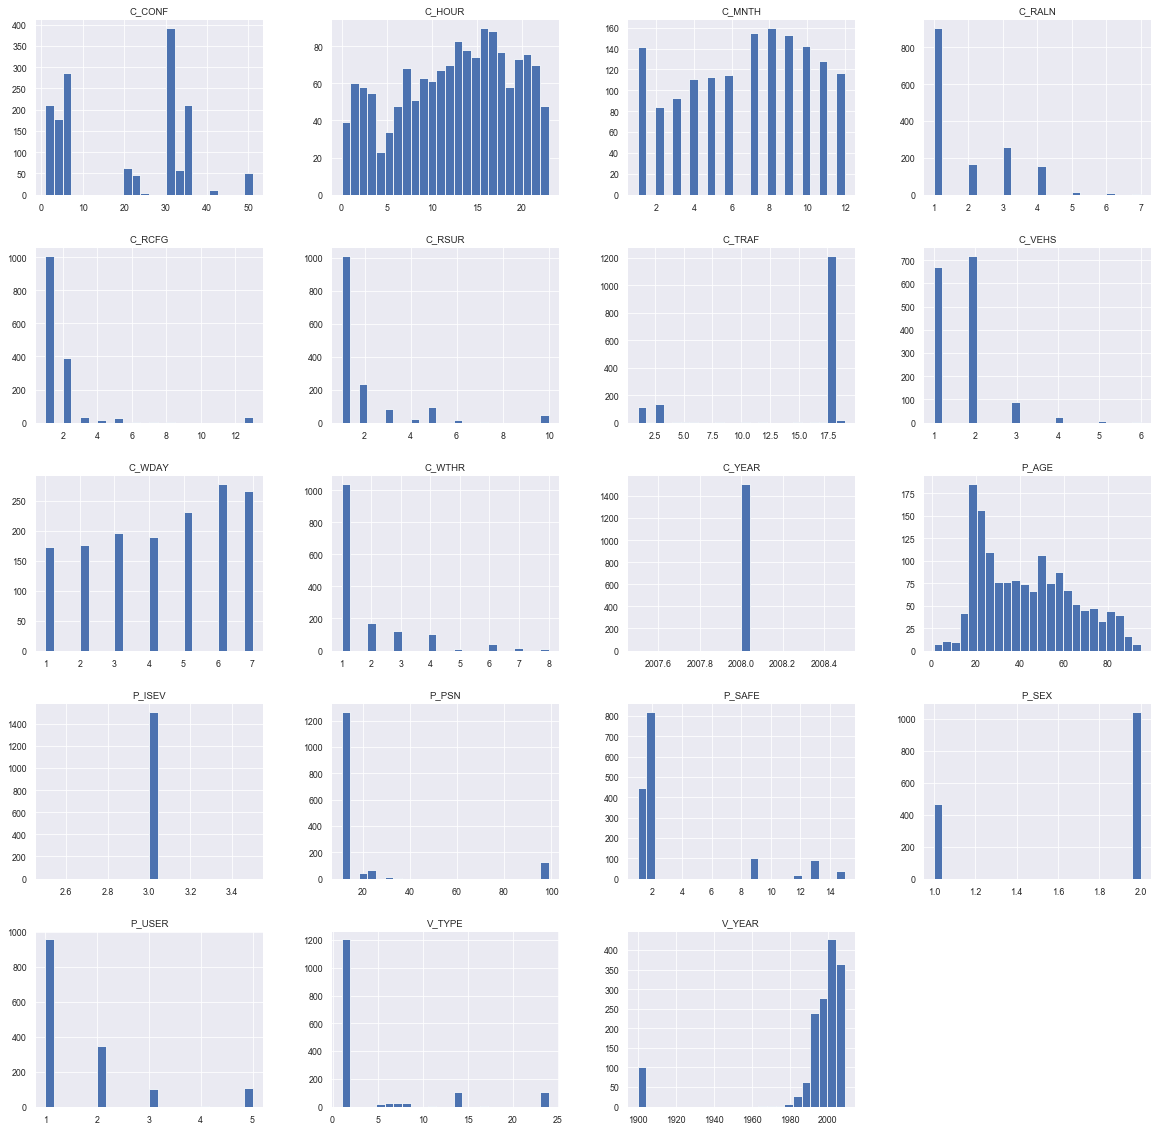

In [78]:
df_08_fatal.astype('int').hist(figsize = [20, 20], bins = 24)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000020682204128>,
      dtype=object)

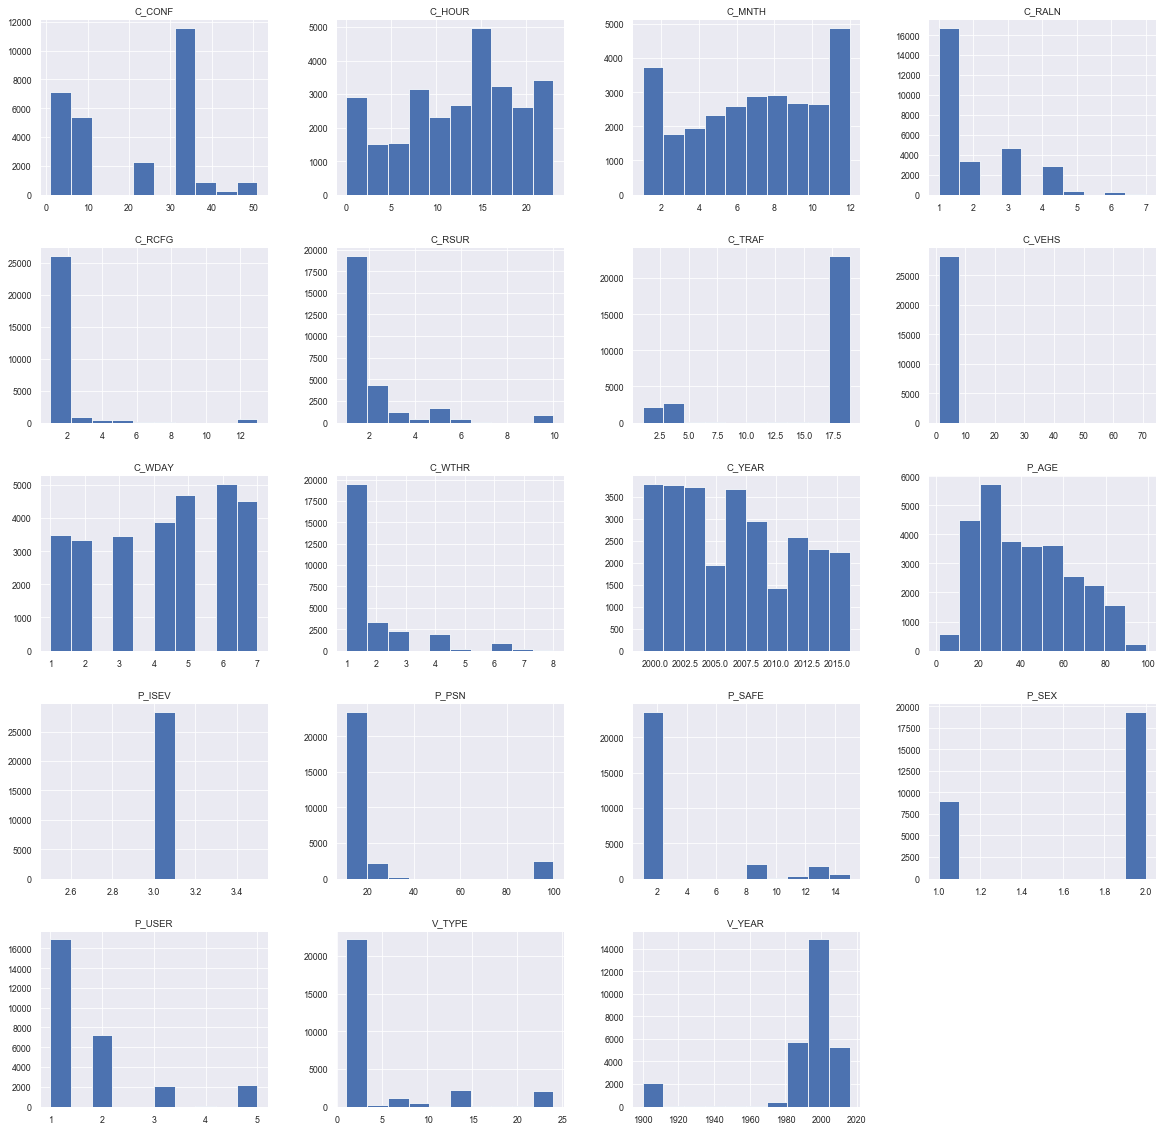

In [44]:
df_fatal.astype('int').hist(figsize = [20, 20])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000020687232FD0>,
      dtype=object)

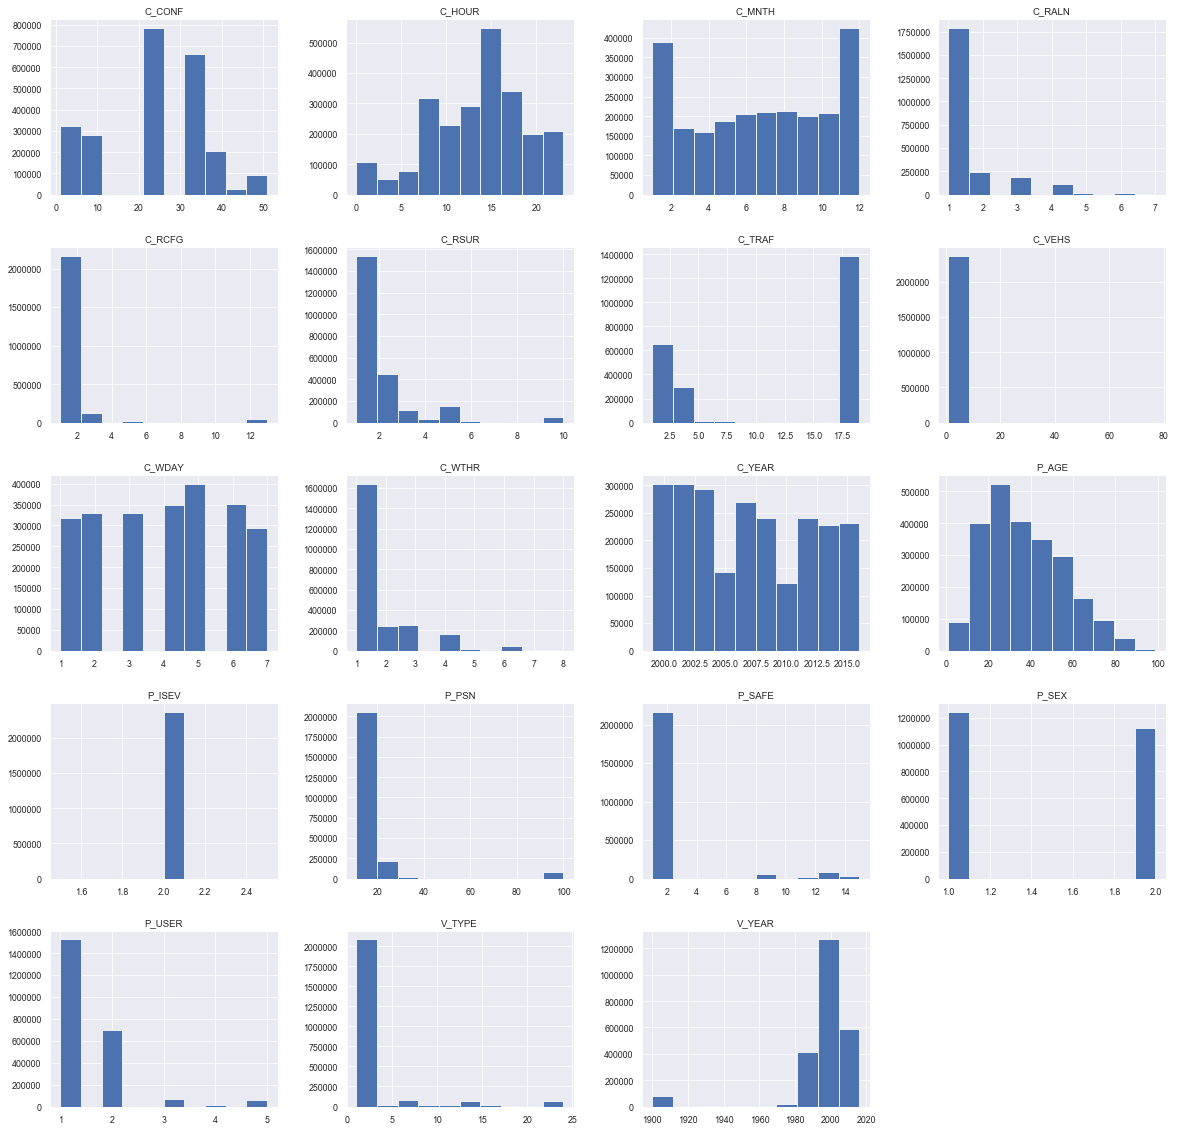

In [45]:
df_injury.astype('int').hist(figsize = [20, 20])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000020686C78550>,
      dtype=object)

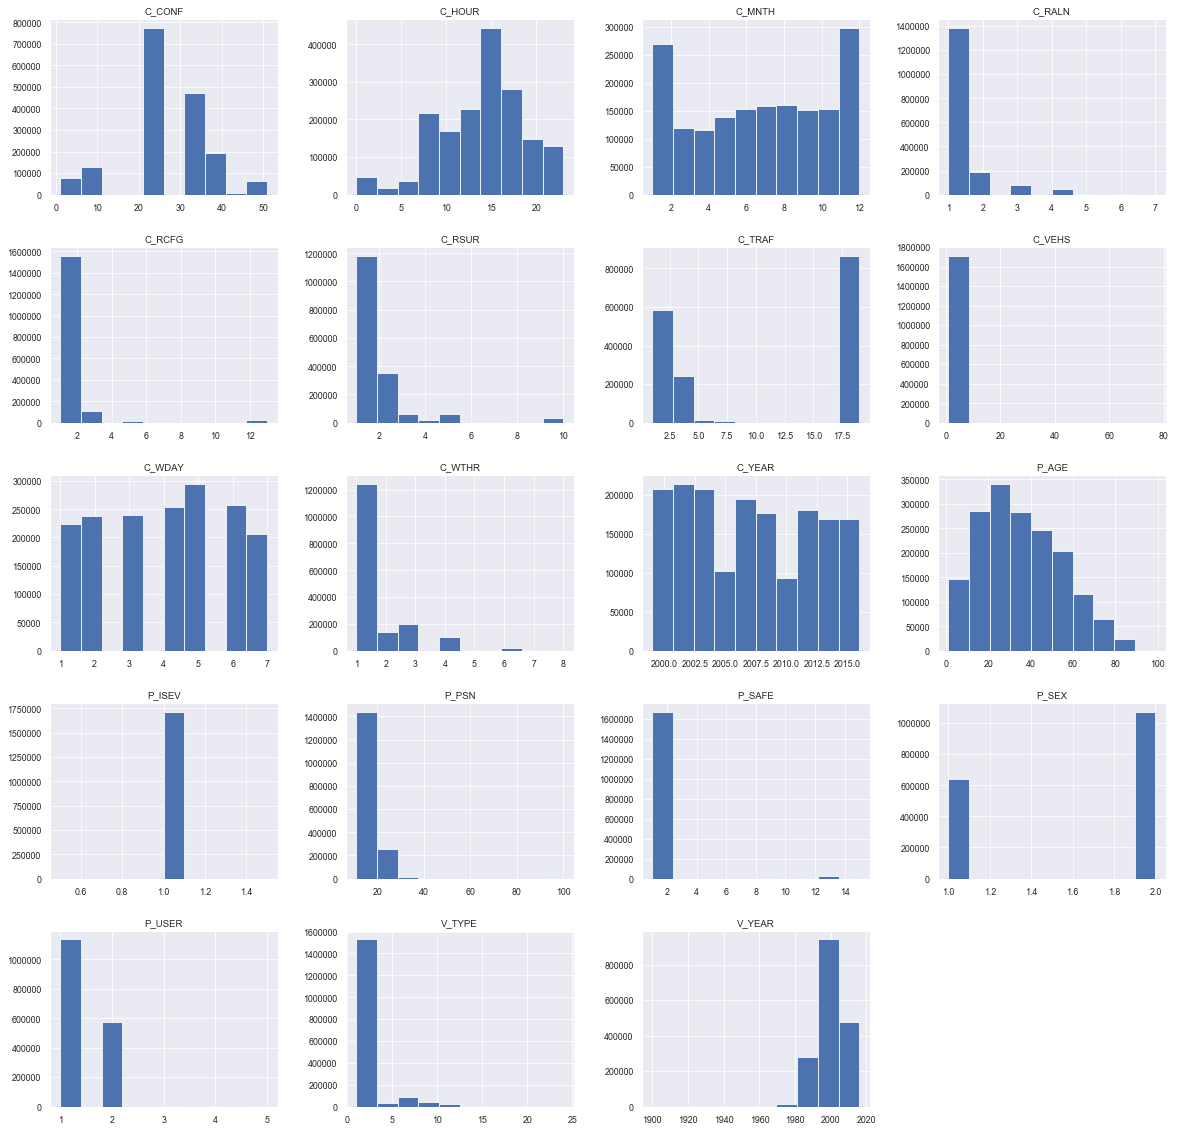

In [46]:
df_safe.astype('int').hist(figsize = [20, 20])

In [47]:
xt = df['C_YEAR'].unique()

C_YEAR
1999    1928
2000    1869
        ... 
2015    1157
2016    1090
Name: 3, Length: 18, dtype: int64
P_ISEV       1       2     3
C_YEAR                      
1999     98789  148053  1928
2000    109367  153847  1869
...        ...     ...   ...
2015     85786  114543  1157
2016     82855  116528  1090

[18 rows x 3 columns]


(1, 17)

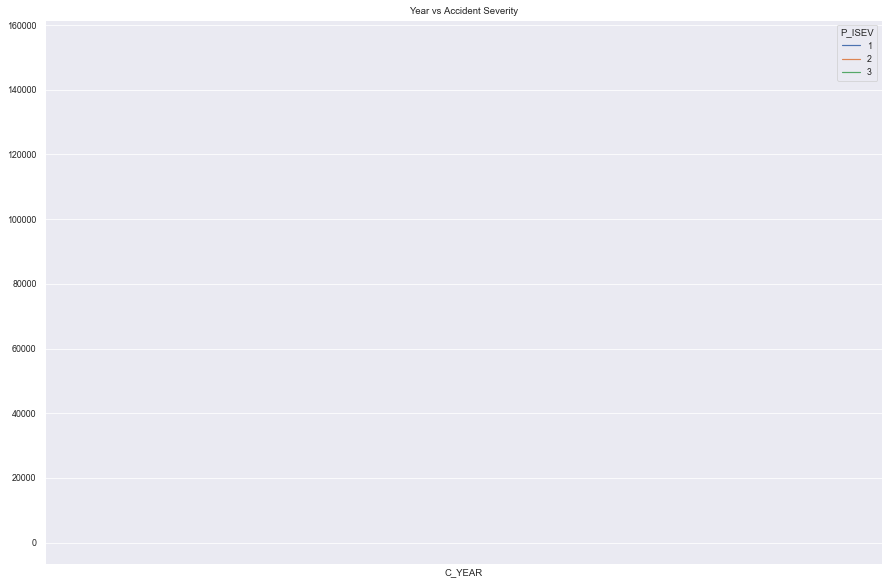

In [48]:
print(df.groupby(['C_YEAR', 'P_ISEV']).size().unstack()[3])
print(df.groupby(['C_YEAR', 'P_ISEV']).size().unstack())
ax = df.astype('int').groupby(['C_YEAR', 'P_ISEV']).size().unstack().plot(figsize=(15,10), kind='line', title = 'Year vs Accident Severity',  xticks = xt)
ax.set_xlim((1,17))

(1, 17)

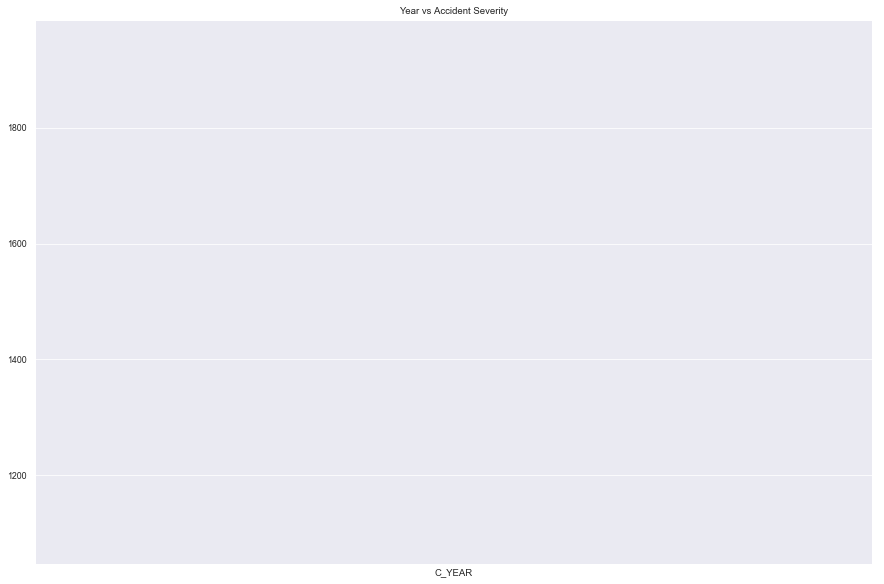

In [49]:
bx = df.astype('int').groupby(['C_YEAR', 'P_ISEV']).size().unstack()[3].plot(figsize=(15,10), kind='line', title = 'Year vs Accident Severity',  xticks = xt)
bx.set_xlim((1,17))

In [50]:
df.dtypes

C_YEAR    category
C_MNTH    category
            ...   
P_USER    category
P_ISEV       int32
Length: 19, dtype: object

In [51]:
def plot_year_vs_cat(data, x, y, title, xt):
    data.astype('int').groupby([x,y]).size().unstack().plot(figsize=(15,4), kind='line', title = title, xticks = xt)
    plt.show()
def plot_year_vs_cat_fatal(data, x, y, title, xt):
    xp = data.astype('int').groupby([x,y]).size().unstack()[3].plot(figsize=(15,4), kind='line', title = title, xticks = xt)
    plt.show()

In [52]:
df.columns

Index(['C_YEAR', 'C_MNTH', 'C_WDAY', 'C_HOUR', 'C_VEHS', 'C_CONF', 'C_RCFG',
       'C_WTHR', 'C_RSUR', 'C_RALN', 'C_TRAF', 'V_TYPE', 'V_YEAR', 'P_SEX',
       'P_AGE', 'P_PSN', 'P_SAFE', 'P_USER', 'P_ISEV'],
      dtype='object')

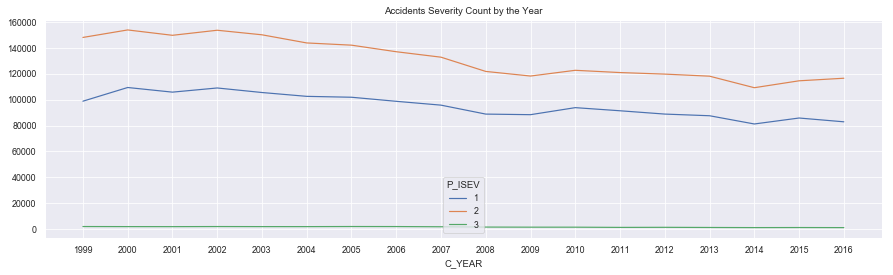

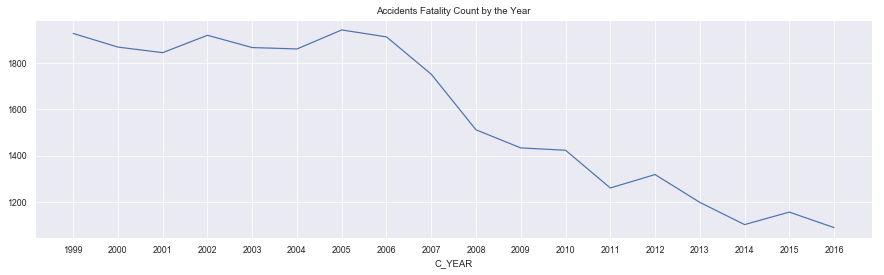

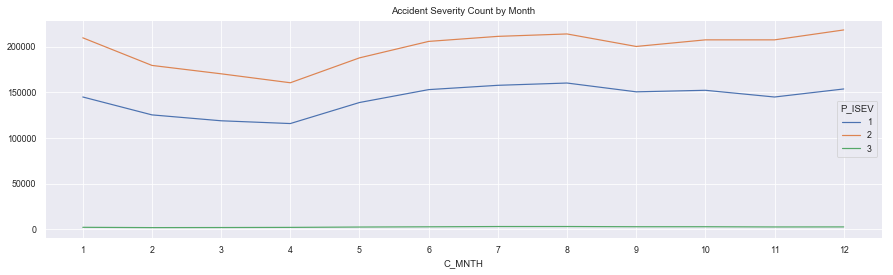

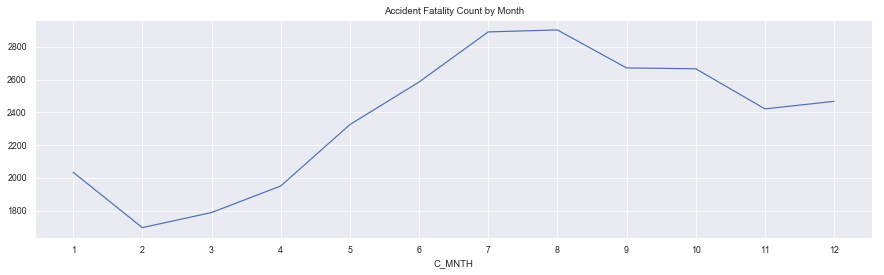

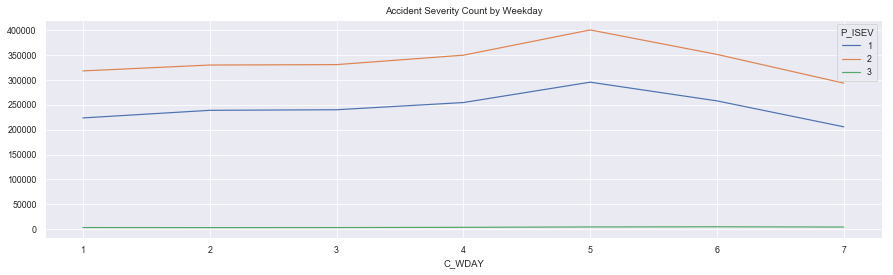

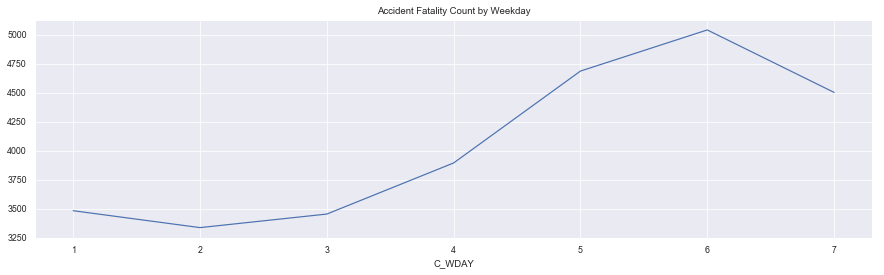

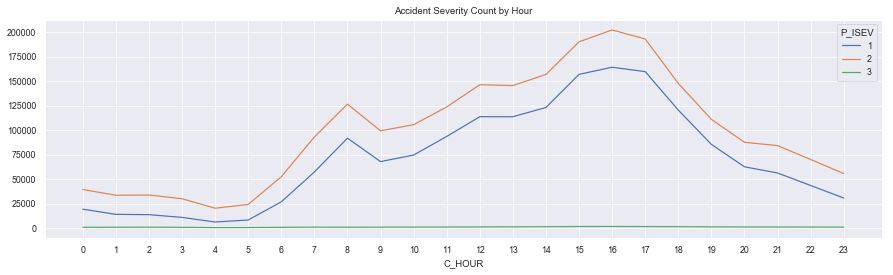

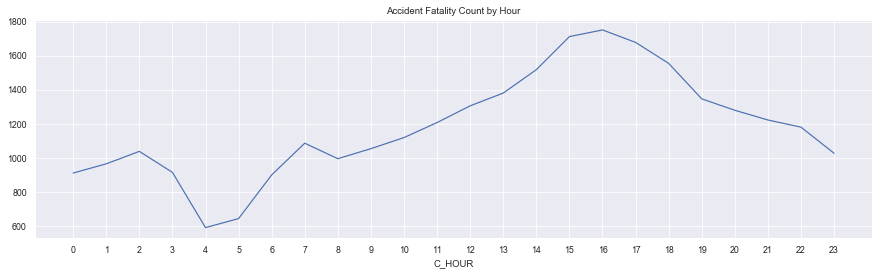

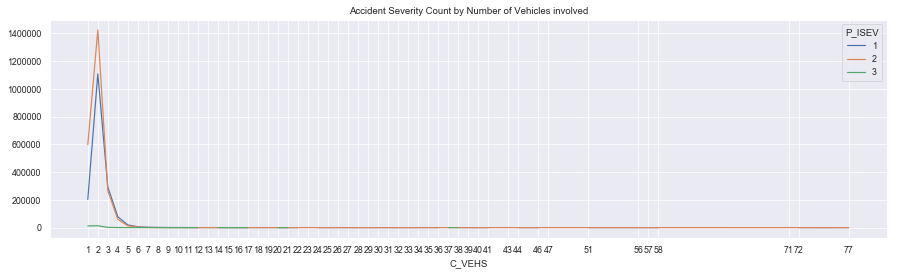

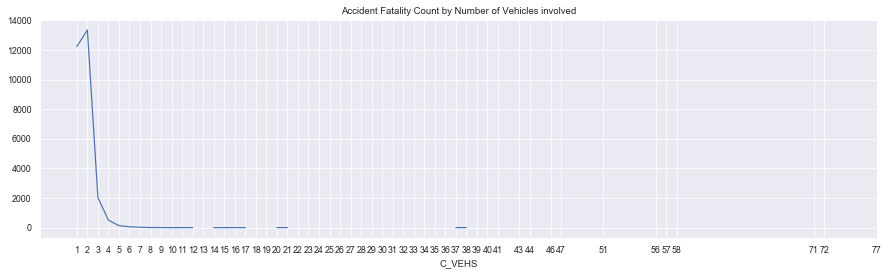

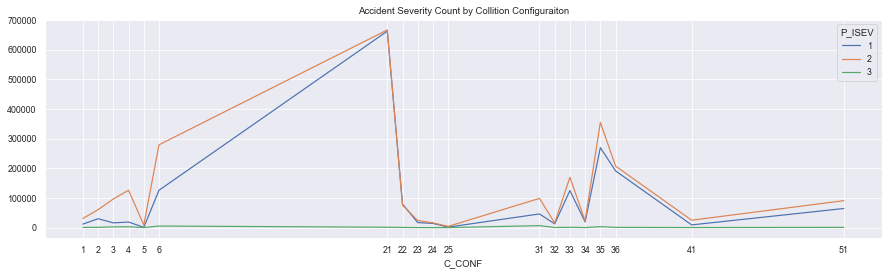

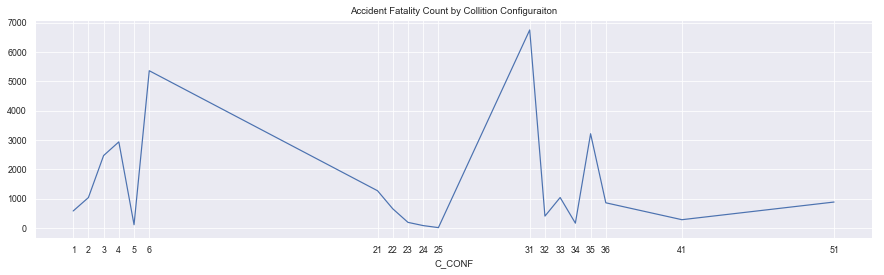

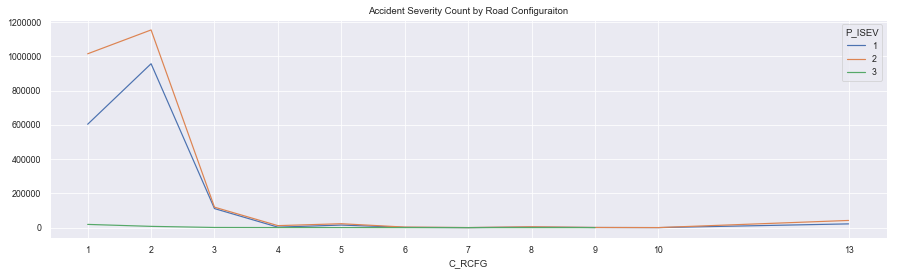

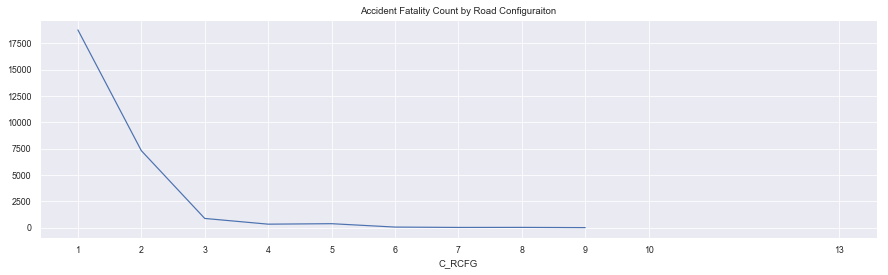

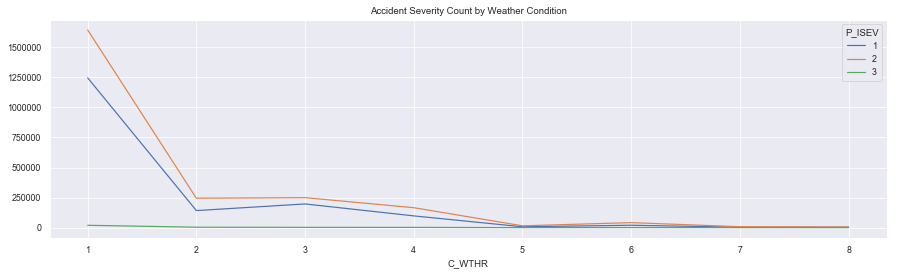

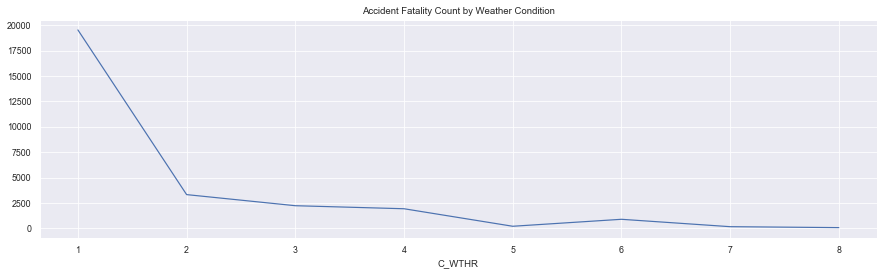

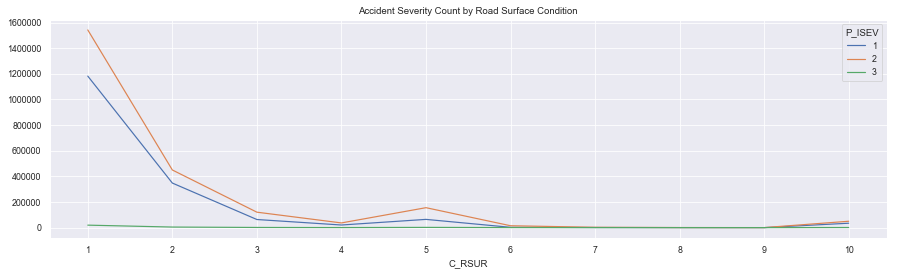

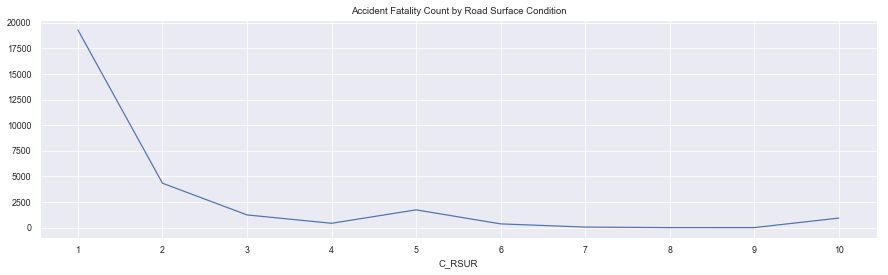

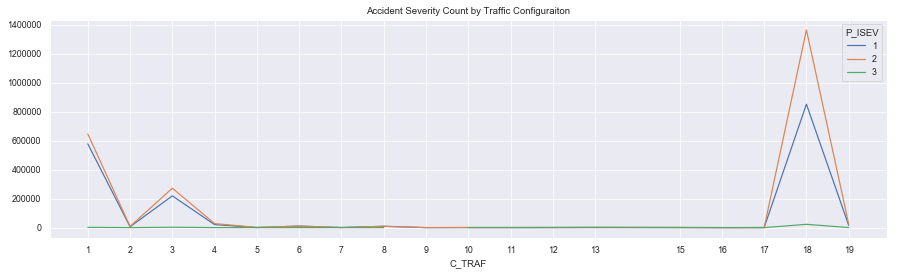

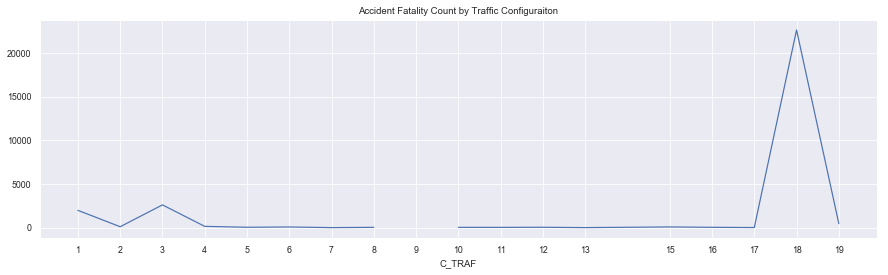

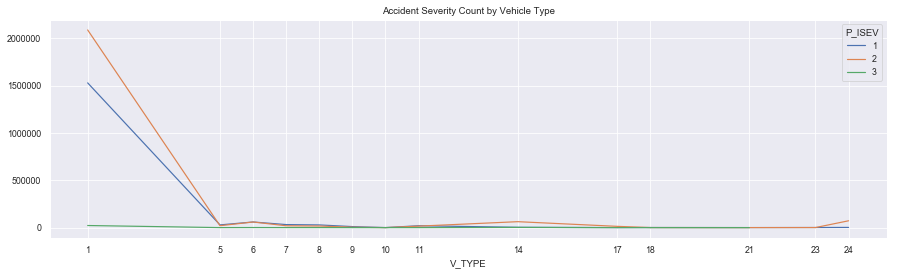

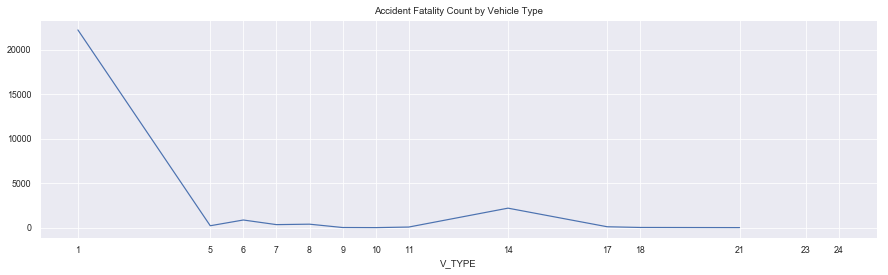

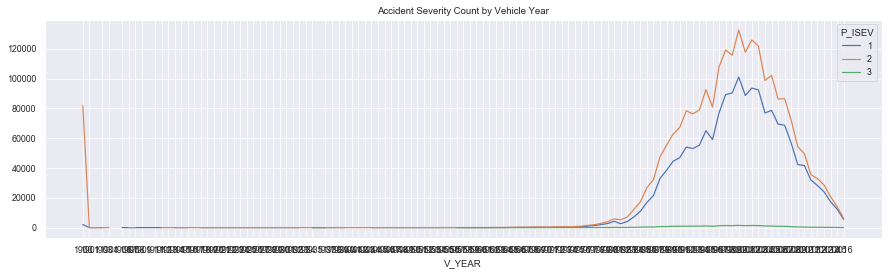

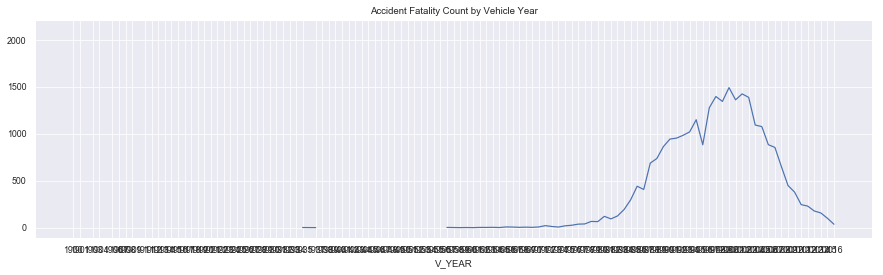

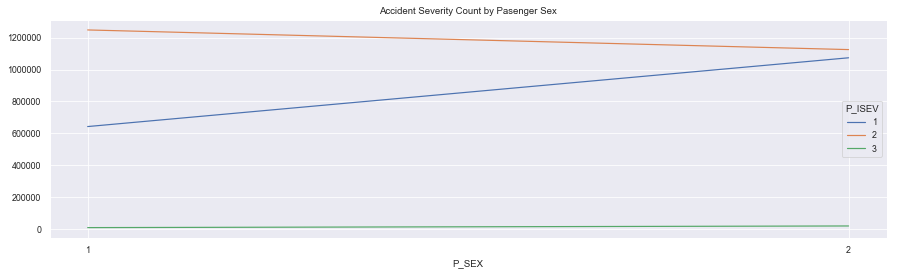

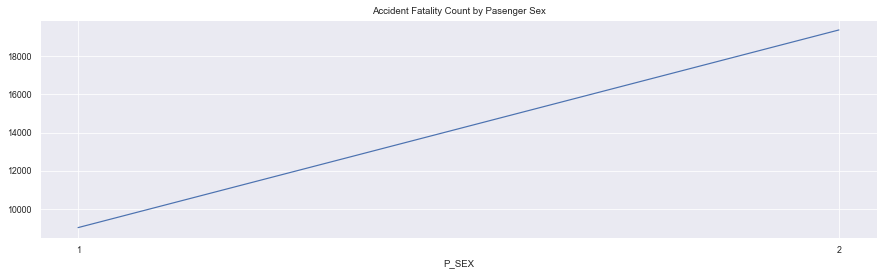

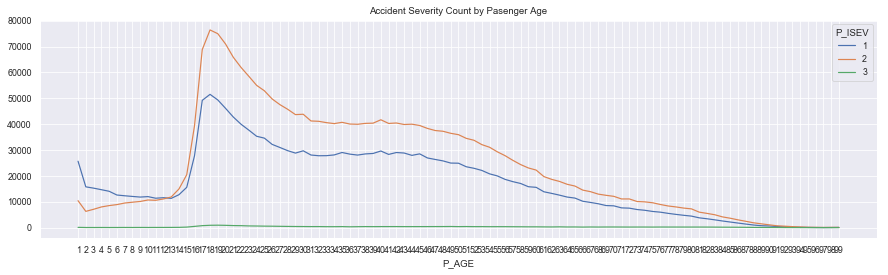

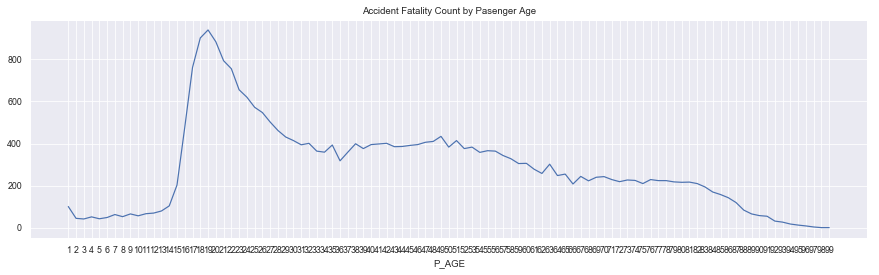

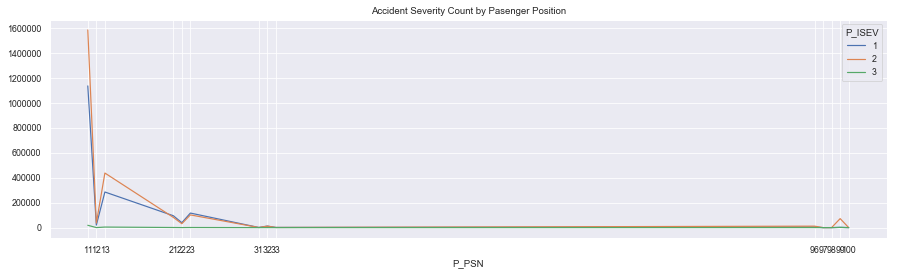

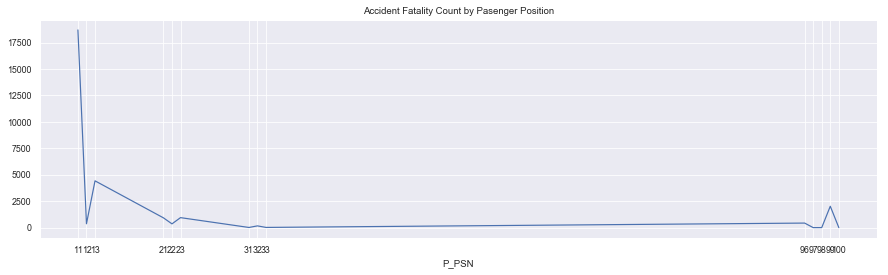

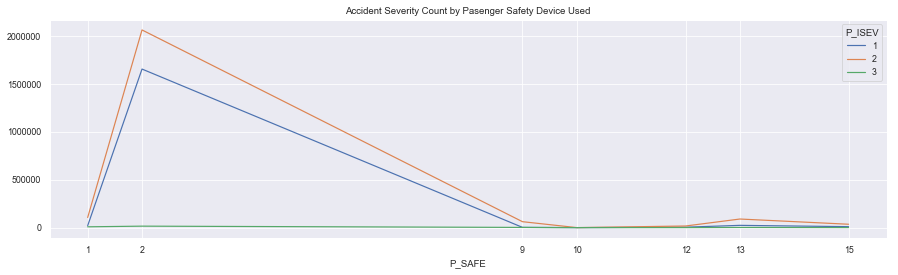

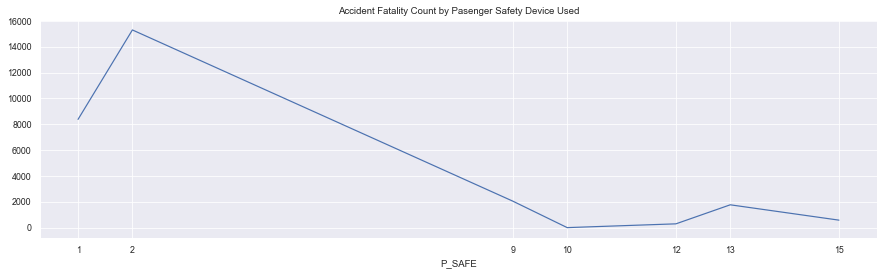

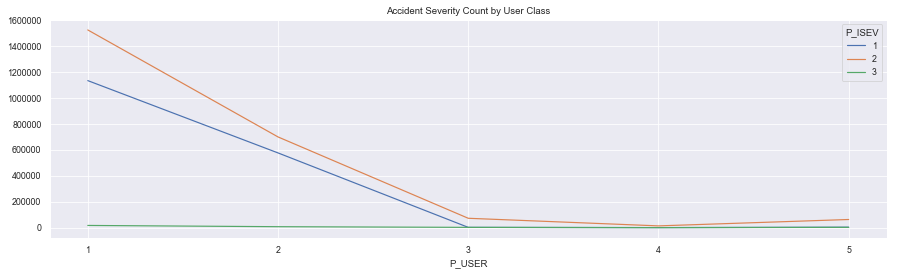

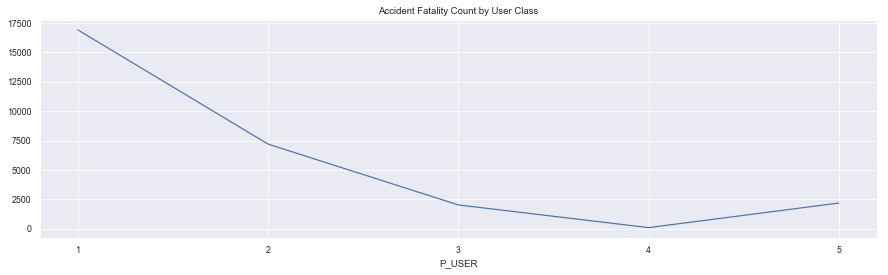

In [55]:
title = "Accidents Severity Count by the Year"
xt = df['C_YEAR'].unique()
plot_year_vs_cat(df, 'C_YEAR', 'P_ISEV', title, xt)
title = "Accidents Fatality Count by the Year"
plot_year_vs_cat_fatal(df, 'C_YEAR', 'P_ISEV', title, xt)

title = "Accident Severity Count by Month"
xt = df['C_MNTH'].unique()
plot_year_vs_cat(df, 'C_MNTH', 'P_ISEV', title, xt)
title = "Accident Fatality Count by Month"
plot_year_vs_cat_fatal(df, 'C_MNTH', 'P_ISEV', title, xt)

title = "Accident Severity Count by Weekday"
xt = df['C_WDAY'].unique()
plot_year_vs_cat(df, 'C_WDAY', 'P_ISEV', title, xt)
title = "Accident Fatality Count by Weekday"
plot_year_vs_cat_fatal(df, 'C_WDAY', 'P_ISEV', title, xt)

title = "Accident Severity Count by Hour"
xt = df['C_HOUR'].unique()
plot_year_vs_cat(df, 'C_HOUR', 'P_ISEV', title, xt)
title = "Accident Fatality Count by Hour"
plot_year_vs_cat_fatal(df, 'C_HOUR', 'P_ISEV', title, xt)

title = "Accident Severity Count by Number of Vehicles involved"
xt = df['C_VEHS'].unique()
plot_year_vs_cat(df, 'C_VEHS', 'P_ISEV', title, xt)
title = "Accident Fatality Count by Number of Vehicles involved"
plot_year_vs_cat_fatal(df, 'C_VEHS', 'P_ISEV', title, xt)

title = "Accident Severity Count by Collision Configuraiton"
xt = df['C_CONF'].unique()
plot_year_vs_cat(df, 'C_CONF', 'P_ISEV', title, xt)
title = "Accident Fatality Count by Collision Configuraiton"
plot_year_vs_cat_fatal(df, 'C_CONF', 'P_ISEV', title, xt)

title = "Accident Severity Count by Road Configuraiton"
xt = df['C_RCFG'].unique()
plot_year_vs_cat(df, 'C_RCFG', 'P_ISEV', title, xt)
title = "Accident Fatality Count by Road Configuraiton"
plot_year_vs_cat_fatal(df, 'C_RCFG', 'P_ISEV', title, xt)

title = "Accident Severity Count by Weather Condition"
xt = df['C_WTHR'].unique()
plot_year_vs_cat(df, 'C_WTHR', 'P_ISEV', title, xt)
title = "Accident Fatality Count by Weather Condition"
plot_year_vs_cat_fatal(df, 'C_WTHR', 'P_ISEV', title, xt)

title = "Accident Severity Count by Road Surface Condition"
xt = df['C_RSUR'].unique()
plot_year_vs_cat(df, 'C_RSUR', 'P_ISEV', title, xt)
title = "Accident Fatality Count by Road Surface Condition"
plot_year_vs_cat_fatal(df, 'C_RSUR', 'P_ISEV', title, xt)

title = "Accident Severity Count by Traffic Configuraiton"
xt = df['C_TRAF'].unique()
plot_year_vs_cat(df, 'C_TRAF', 'P_ISEV', title, xt)
title = "Accident Fatality Count by Traffic Configuraiton"
plot_year_vs_cat_fatal(df, 'C_TRAF', 'P_ISEV', title, xt)

title = "Accident Severity Count by Vehicle Type"
xt = df['V_TYPE'].unique()
plot_year_vs_cat(df, 'V_TYPE', 'P_ISEV', title, xt)
title = "Accident Fatality Count by Vehicle Type"
plot_year_vs_cat_fatal(df, 'V_TYPE', 'P_ISEV', title, xt)

title = "Accident Severity Count by Vehicle Year"
xt = df['V_YEAR'].unique()
plot_year_vs_cat(df, 'V_YEAR', 'P_ISEV', title, xt)
title = "Accident Fatality Count by Vehicle Year"
plot_year_vs_cat_fatal(df, 'V_YEAR', 'P_ISEV', title, xt)

title = "Accident Severity Count by Pasenger Sex"
xt = df['P_SEX'].unique()
plot_year_vs_cat(df, 'P_SEX', 'P_ISEV', title, xt)
title = "Accident Fatality Count by Pasenger Sex"
plot_year_vs_cat_fatal(df, 'P_SEX', 'P_ISEV', title, xt)

title = "Accident Severity Count by Pasenger Age"
xt = df['P_AGE'].unique()
plot_year_vs_cat(df, 'P_AGE', 'P_ISEV', title, xt)
title = "Accident Fatality Count by Pasenger Age"
plot_year_vs_cat_fatal(df, 'P_AGE', 'P_ISEV', title, xt)

title = "Accident Severity Count by Pasenger Position"
xt = df['P_PSN'].unique()
plot_year_vs_cat(df, 'P_PSN', 'P_ISEV', title, xt)
title = "Accident Fatality Count by Pasenger Position"
plot_year_vs_cat_fatal(df, 'P_PSN', 'P_ISEV', title, xt)

title = "Accident Severity Count by Pasenger Safety Device Used"
xt = df['P_SAFE'].unique()
plot_year_vs_cat(df, 'P_SAFE', 'P_ISEV', title, xt)
title = "Accident Fatality Count by Pasenger Safety Device Used"
plot_year_vs_cat_fatal(df, 'P_SAFE', 'P_ISEV', title, xt)

title = "Accident Severity Count by User Class"
xt = df['P_USER'].unique()
plot_year_vs_cat(df, 'P_USER', 'P_ISEV', title, xt)
title = "Accident Fatality Count by User Class"
plot_year_vs_cat_fatal(df, 'P_USER', 'P_ISEV', title, xt)


In [ ]:
#for year 2016

title = "Accidents Severity Count by the Year"
xt = df['C_YEAR'].unique()
plot_year_vs_cat(df, 'C_YEAR', 'P_ISEV', title, xt)

title = "Accident Severity Count by Month"
xt = df['C_MNTH'].unique()
plot_year_vs_cat(df, 'C_MNTH', 'P_ISEV', title, xt)

title = "Accident Severity Count by Weekday"
xt = df['C_WDAY'].unique()
plot_year_vs_cat(df, 'C_WDAY', 'P_ISEV', title, xt)

title = "Accident Severity Count by Hour"
xt = df['C_HOUR'].unique()
plot_year_vs_cat(df, 'C_HOUR', 'P_ISEV', title, xt)


title = "Accident Severity Count by Number of Vehicles involved"
xt = df['C_VEHS'].unique()
plot_year_vs_cat(df, 'C_VEHS', 'P_ISEV', title, xt)


title = "Accident Severity Count by Collision Configuraiton"
xt = df['C_CONF'].unique()
plot_year_vs_cat(df, 'C_CONF', 'P_ISEV', title, xt)


title = "Accident Severity Count by Road Configuraiton"
xt = df['C_RCFG'].unique()
plot_year_vs_cat(df, 'C_RCFG', 'P_ISEV', title, xt)


title = "Accident Severity Count by Weather Condition"
xt = df['C_WTHR'].unique()
plot_year_vs_cat(df, 'C_WTHR', 'P_ISEV', title, xt)

title = "Accident Severity Count by Road Surface Condition"
xt = df['C_RSUR'].unique()
plot_year_vs_cat(df, 'C_RSUR', 'P_ISEV', title, xt)


title = "Accident Severity Count by Traffic Configuraiton"
xt = df['C_TRAF'].unique()
plot_year_vs_cat(df, 'C_TRAF', 'P_ISEV', title, xt)


title = "Accident Severity Count by Vehicle Type"
xt = df['V_TYPE'].unique()
plot_year_vs_cat(df, 'V_TYPE', 'P_ISEV', title, xt)


title = "Accident Severity Count by Vehicle Year"
xt = df['V_YEAR'].unique()
plot_year_vs_cat(df, 'V_YEAR', 'P_ISEV', title, xt)


title = "Accident Severity Count by Pasenger Sex"
xt = df['P_SEX'].unique()
plot_year_vs_cat(df, 'P_SEX', 'P_ISEV', title, xt)


title = "Accident Severity Count by Pasenger Age"
xt = df['P_AGE'].unique()
plot_year_vs_cat(df, 'P_AGE', 'P_ISEV', title, xt)

title = "Accident Severity Count by Pasenger Position"
xt = df['P_PSN'].unique()
plot_year_vs_cat(df, 'P_PSN', 'P_ISEV', title, xt)


title = "Accident Severity Count by Pasenger Safety Device Used"
xt = df['P_SAFE'].unique()
plot_year_vs_cat(df, 'P_SAFE', 'P_ISEV', title, xt)


title = "Accident Severity Count by User Class"
xt = df['P_USER'].unique()
plot_year_vs_cat(df, 'P_USER', 'P_ISEV', title, xt)

,C_YEAR,fatal,injury,no_injury
0,1999,1928,148053,98789
1,2000,1869,153847,109367
...,...,...,...,...
16,2015,1157,114543,85786
17,2016,1090,116528,82855


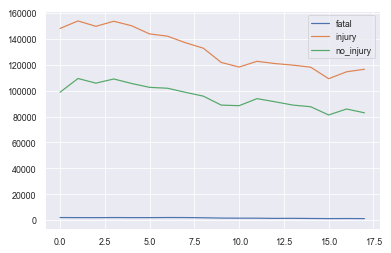

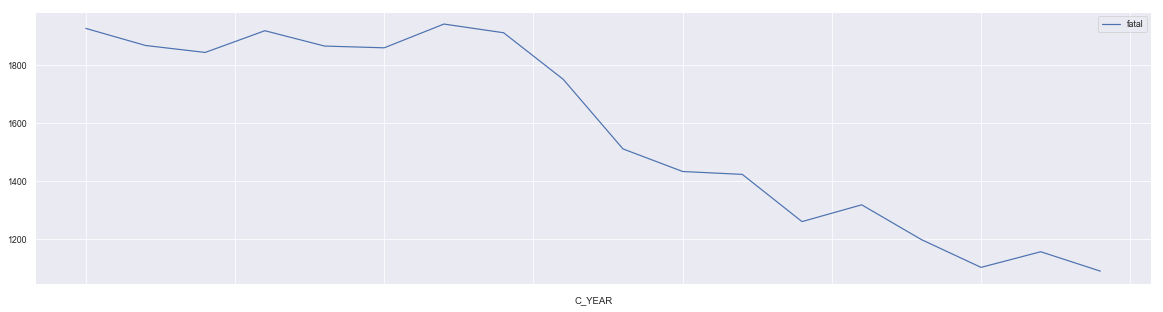

In [54]:
## Plot accident serverity by Year
df_tmp = df.copy()
df_tmp['fatal']=np.where(df_tmp['P_ISEV'] == 3,1,0)
df_tmp['injury']=np.where(df_tmp['P_ISEV'] == 2,1,0)
df_tmp['no_injury']=np.where(df_tmp['P_ISEV'] == 1,1,0)

df_plot = df_tmp.groupby('C_YEAR')['fatal','injury', 'no_injury'].sum()

tmp = df_plot.index
df_plot.reset_index(inplace=True)
df_plot['C_YEAR'] = tmp
display(df_plot)

xt = df['C_YEAR'].unique()
title = "Accident Severity Count by Year"
df_plot.plot()
df_plot[['C_YEAR', 'fatal']].plot(x = 'C_YEAR', figsize = [20,5])